In [11]:
import pandas as pd

# Load the dataset
df = pd.read_csv("netflix_titles.csv")

# Preview the data
df.head()


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [12]:
# Basic structure and types
df.info()

# Summary statistics for object and numerical-like columns
df.describe(include='all')

# Check for missing values
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

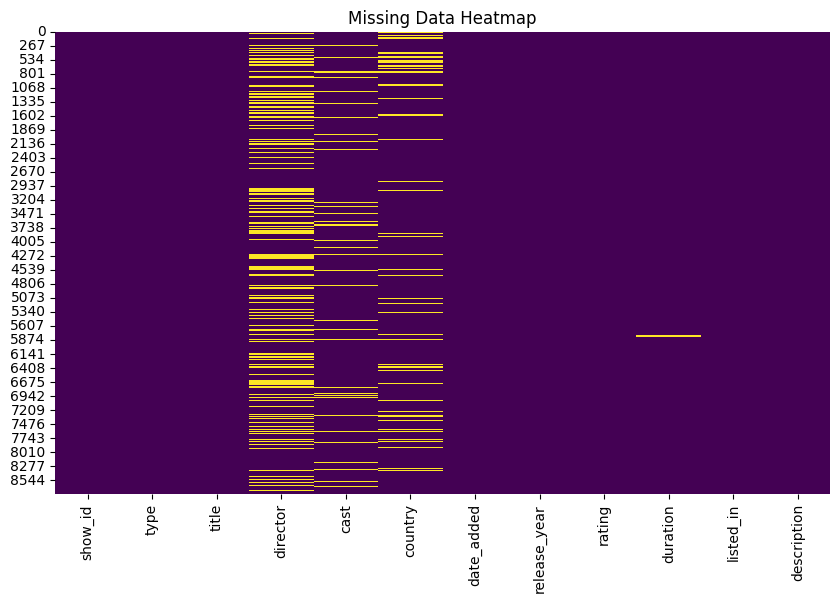

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title("Missing Data Heatmap")
plt.show()


Available columns: Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')


C:\Users\adnan\AppData\Local\Temp\ipykernel_6136\1388348121.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='type', palette='Set2')


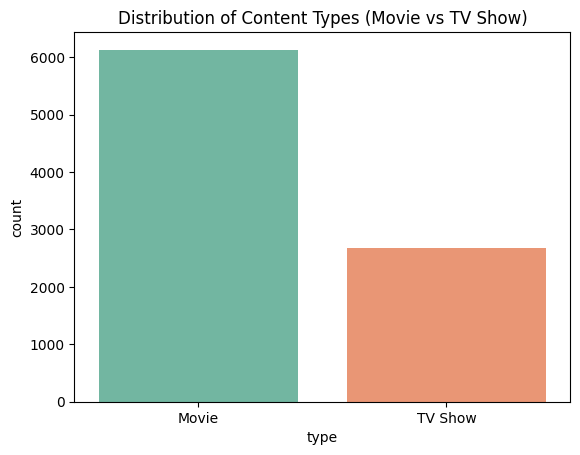

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

# Fix any column name issues (e.g., extra spaces)
df.columns = df.columns.str.strip()

# Confirm available columns
print("Available columns:", df.columns)

# Plot distribution of content types
sns.countplot(data=df, x='type', palette='Set2')
plt.title("Distribution of Content Types (Movie vs TV Show)")
plt.show()


C:\Users\adnan\AppData\Local\Temp\ipykernel_6136\3863014377.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, y='rating', order=df['rating'].value_counts().index, palette='cool')


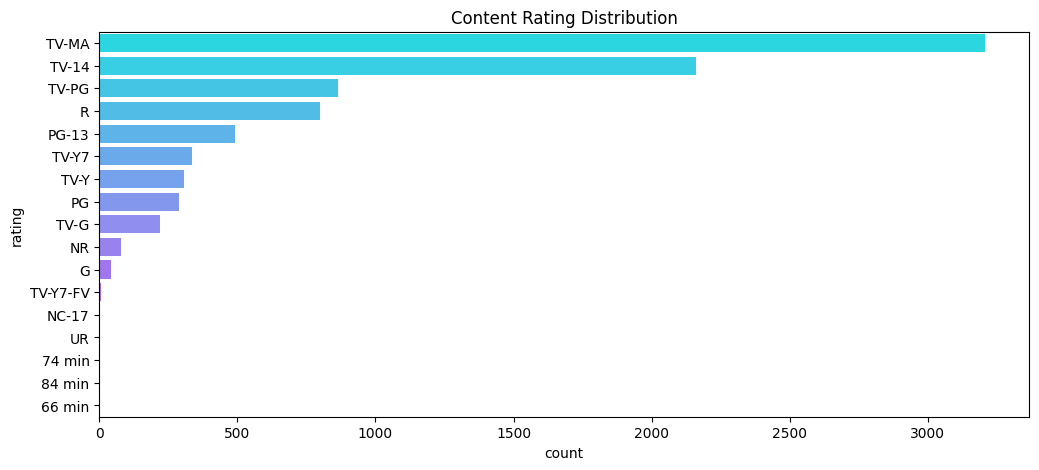

In [15]:
plt.figure(figsize=(12, 5))
sns.countplot(data=df, y='rating', order=df['rating'].value_counts().index, palette='cool')
plt.title("Content Rating Distribution")
plt.show()


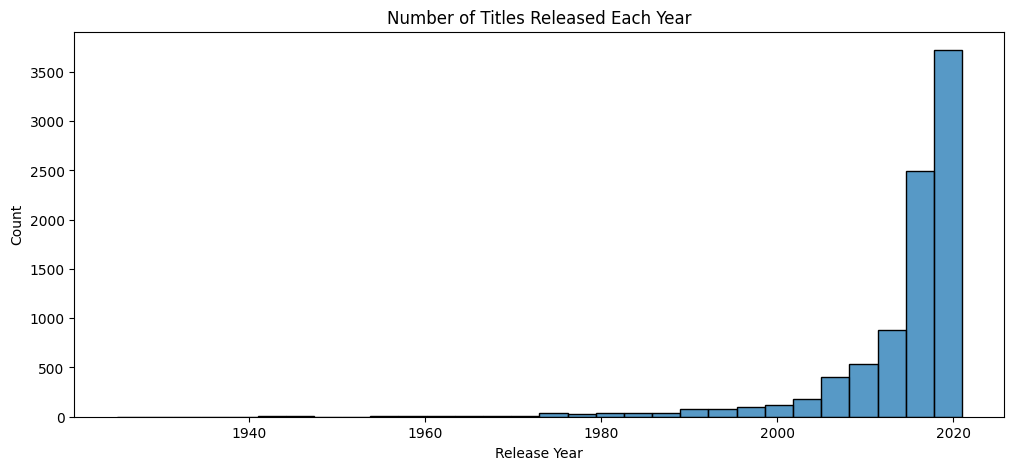

In [16]:
df['release_year'] = pd.to_numeric(df['release_year'], errors='coerce')

plt.figure(figsize=(12, 5))
sns.histplot(df['release_year'].dropna(), bins=30, kde=False)
plt.title("Number of Titles Released Each Year")
plt.xlabel("Release Year")
plt.ylabel("Count")
plt.show()

C:\Users\adnan\AppData\Local\Temp\ipykernel_6136\1463792149.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=genre_df, x='Count', y='Genre', palette='viridis')


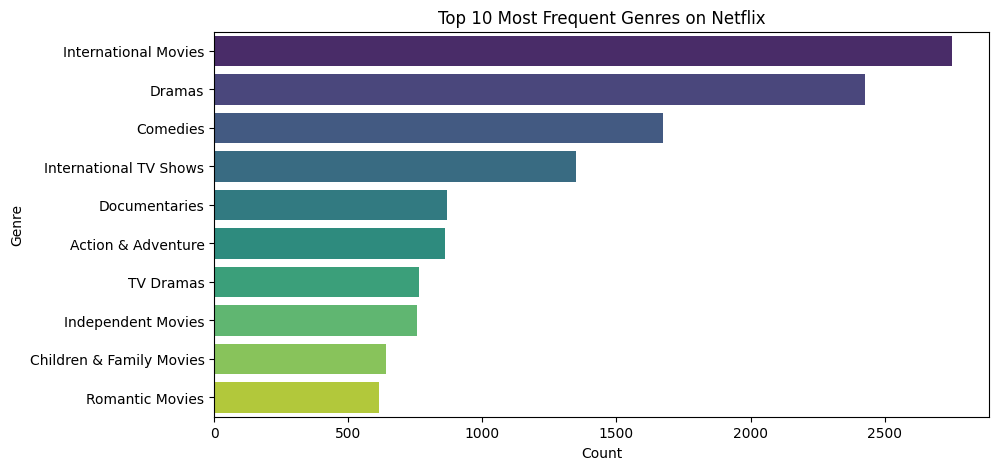

In [17]:
from collections import Counter

genres = df['listed_in'].dropna().str.split(', ')
genre_flat = [genre for sublist in genres for genre in sublist]
top_genres = Counter(genre_flat).most_common(10)

# Convert to DataFrame
genre_df = pd.DataFrame(top_genres, columns=['Genre', 'Count'])

# Plot
plt.figure(figsize=(10, 5))
sns.barplot(data=genre_df, x='Count', y='Genre', palette='viridis')
plt.title("Top 10 Most Frequent Genres on Netflix")
plt.show()

In [21]:
!pip install WordCloud


[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


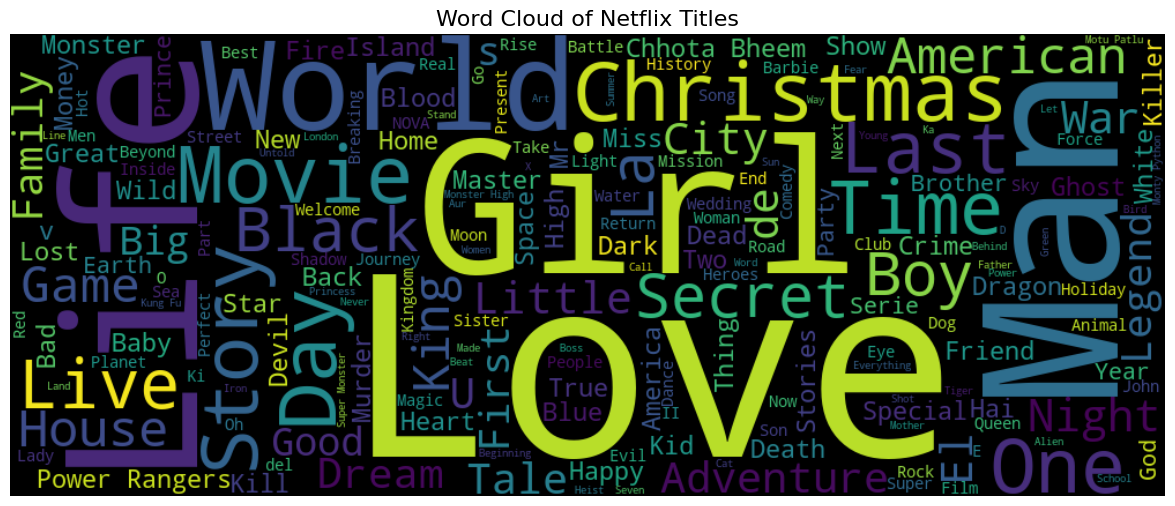

In [22]:
from wordcloud import WordCloud

title_words = ' '.join(df['title'].dropna())

wordcloud = WordCloud(background_color='black', width=1000, height=400).generate(title_words)

plt.figure(figsize=(15, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud of Netflix Titles", fontsize=16)
plt.show()

In [23]:
df.to_csv("cleaned_netflix_data.csv", index=False)